In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [7]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

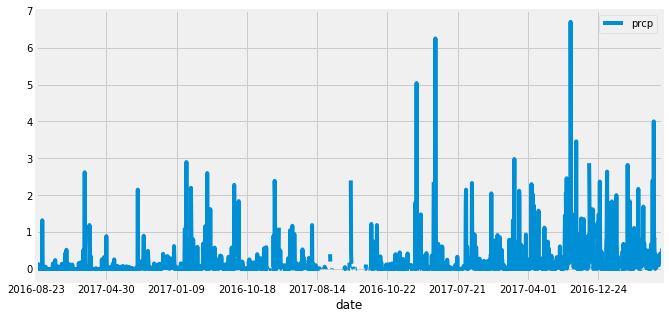

In [29]:
last_data = session.query(func.max(Measurement.date)).scalar()

last_data = dt.date(2017, 8 ,23)
year_ago = last_data - dt.timedelta(days=365)

pdata = [Measurement.date, Measurement.prcp]

prc_data = session.query(*pdata).\
    filter(Measurement.date <= last_data).\
    filter(Measurement.date >= year_ago).all()

df = pd.DataFrame(prc_data, columns=['date', 'prcp'])


df.plot(x='date', y='prcp', figsize=(10,5))
plt.xlabel("date")
plt.show()

![precipitation](Images/precipitation.png)

In [30]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [31]:
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [32]:
# Design a query to show how many stations are available in this dataset?


In [35]:
count= session.query(func.count(Station.station)).scalar()
count

9

In [37]:
stations = session.query(Measurement.station, 
              func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count
              (Measurement.station).desc()).all()

stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [38]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [39]:
t_min = session.query(func.min(Measurement.tobs)).all()
t_max = session.query(func.max(Measurement.tobs)).all()
t_avg = session.query(func.avg(Measurement.tobs)).all()

print(t_min, t_max, t_avg)

[(53.0,)] [(87.0,)] [(73.09795396419437,)]


In [40]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [45]:
obs = session.query(Measurement.station, Station.name, func.count(Measurement.station)).\
filter(Measurement.station == Station.station).group_by(Measurement.station)\
.order_by(func.count(Measurement.station).desc()).first()


# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tdata = [Measurement.date, Measurement.tobs, Measurement.station]

temp_data = session.query(*tdata).\
    filter(Measurement.station=='USC00519281').\
    filter(Measurement.date <= maxDate).\
    filter(Measurement.date >= year_ago).all()

twelve = pd.DataFrame(temp_data, columns=['date','temp_obs','station'])
t_obs = twelve['temp_obs']
t_obs.head()

0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
Name: temp_obs, dtype: float64

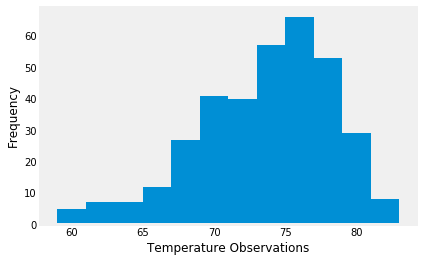

In [47]:
plt.hist(tobs, bins=12)
plt.xlabel('Temperature Observations')
plt.ylabel('Frequency')
plt.grid()
plt.show()



In [1]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [49]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [50]:
print(calc_temps('2016-02-28','2016-03-05'))

[(62.0, 69.88636363636364, 80.0)]


In [51]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


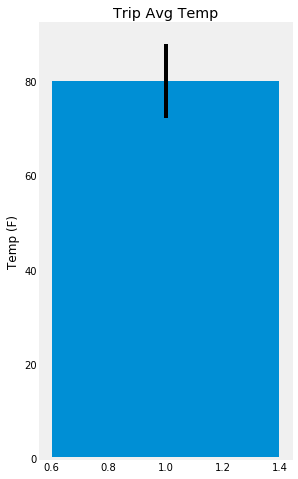

In [58]:
tmax = 62
tmin = 69.89
tavg = 80
difftemp = tmax - tmin

plt.figure(figsize=(4, 8))
plt.bar(1, tavg, yerr=difftemp)
plt.ylabel('Temp (F)')
plt.title('Trip Avg Temp')
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


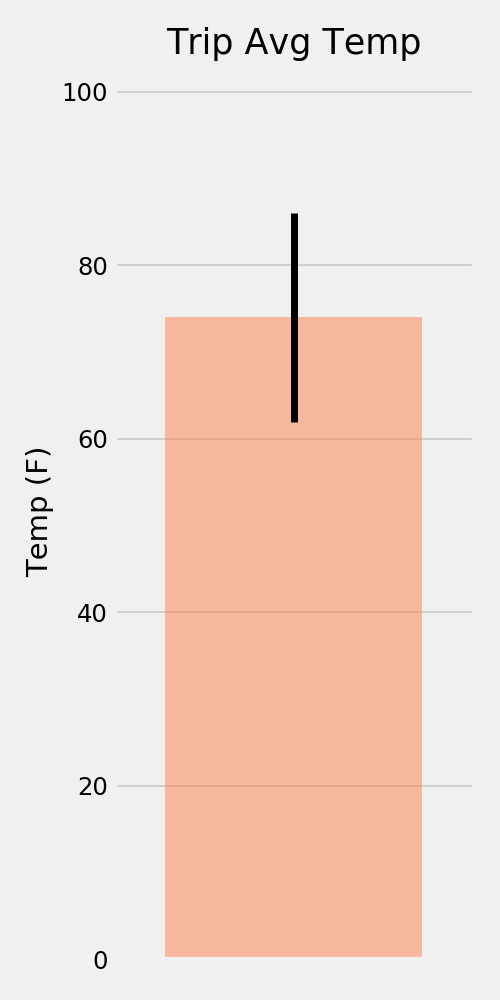

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [61]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

date = dt.date(2016, 6 ,10)
one_year = endDate - dt.timedelta(days=365)


rainfall_data = session.query(Measurement.station, Measurement.prcp, Station.name, Station.longitude, Station.latitude, Station.elevation).\
    filter(Measurement.date <= date).\
    filter(Measurement.date >= one_year).\
    group_by(Station.name).\
    order_by(Measurement.prcp).all()

rainfall_data



[('USC00519397',
  0.0,
  'HONOLULU OBSERVATORY 702.2, HI US',
  -157.9992,
  21.3152,
  0.9),
 ('USC00519397', 0.0, 'KANEOHE 838.1, HI US', -157.8015, 21.4234, 14.6),
 ('USC00519397',
  0.0,
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  -157.8374,
  21.5213,
  7.0),
 ('USC00519397',
  0.0,
  'MANOA LYON ARBO 785.2, HI US',
  -157.8025,
  21.3331,
  152.4),
 ('USC00519397', 0.0, 'PEARL CITY, HI US', -157.9751, 21.3934, 11.9),
 ('USC00519397', 0.0, 'UPPER WAHIAWA 874.3, HI US', -158.0111, 21.4992, 306.6),
 ('USC00519397',
  0.0,
  'WAIHEE 837.5, HI US',
  -157.84888999999998,
  21.45167,
  32.9),
 ('USC00519397', 0.0, 'WAIKIKI 717.2, HI US', -157.8168, 21.2716, 3.0),
 ('USC00519397',
  0.0,
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  -157.71139,
  21.33556,
  19.5)]

## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


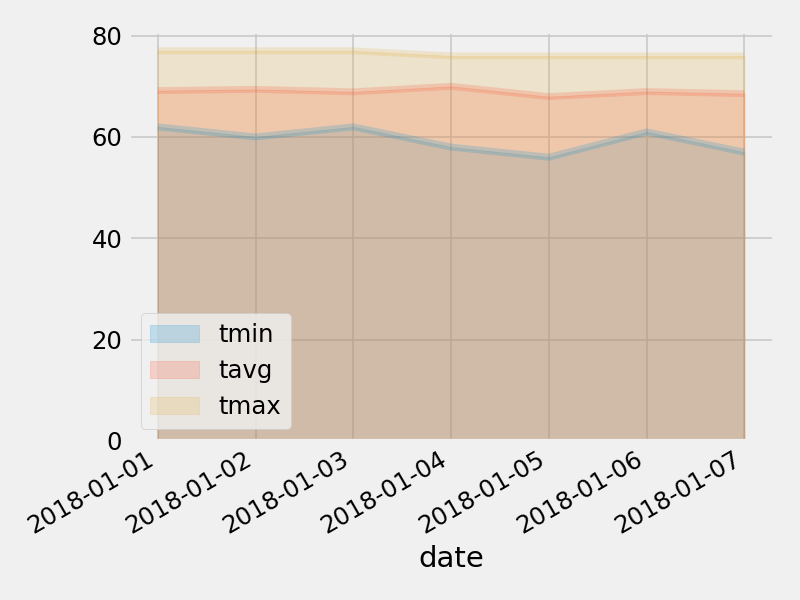

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
